In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import d2l

In [2]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [3]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.9314],
         [-0.9509]]),
 tensor([[ 1.0000e+00,  9.3143e-01,  4.3378e-01,  1.3468e-01,  3.1361e-02,
           5.8420e-03,  9.0691e-04,  1.2067e-04,  1.4050e-05,  1.4541e-06,
           1.3543e-07,  1.1468e-08,  8.9013e-10,  6.3776e-11,  4.2431e-12,
           2.6348e-13,  1.5338e-14,  8.4037e-16,  4.3486e-17,  2.1318e-18],
         [ 1.0000e+00, -9.5087e-01,  4.5208e-01, -1.4329e-01,  3.4062e-02,
          -6.4778e-03,  1.0266e-03, -1.3945e-04,  1.6575e-05, -1.7512e-06,
           1.6652e-07, -1.4394e-08,  1.1406e-09, -8.3427e-11,  5.6663e-12,
          -3.5919e-13,  2.1347e-14, -1.1940e-15,  6.3074e-17, -3.1566e-18]]),
 tensor([5.4689, 1.5692]))

In [4]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.98289    1.2521253 -3.3479881  5.4894857]]


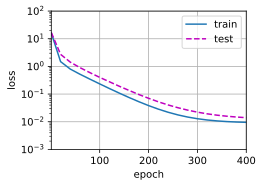

In [5]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

weight: [[3.8501158 3.1559727]]


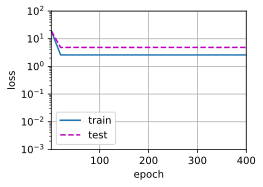

In [6]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

weight: [[ 4.99871445e+00  1.28355825e+00 -3.38253355e+00  5.19790220e+00
  -1.46779090e-01  1.13117683e+00 -1.70814637e-02  2.49250010e-01
  -1.69548646e-01 -1.70505822e-01  3.46678458e-02  1.24848574e-01
   2.74799149e-02 -1.35903403e-01 -9.06521082e-02 -2.39623189e-02
  -2.52838824e-02 -1.60708264e-01  1.45363450e-01 -2.66911928e-03]]


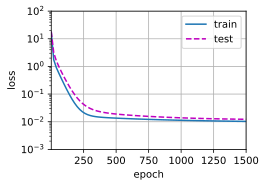

In [7]:
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)